In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output


env = gym.make('CartPole-v1', render_mode="human")

print("Action Space: ", env.action_space)
print("Obs Space: ", env.observation_space)


Action Space:  Discrete(2)
Obs Space:  Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


In [2]:
observation, info = env.reset()

In [3]:
history = [[] for _ in range(4)]

In [4]:

for _ in range(100):

    env.render()    

 
    #world time step
    action = env.action_space.sample()  # agent policy that uses the observation and info
    action = 0
    obs, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        obs, info = env.reset()
    
    for i in range(4):
        history[i].append(obs[i])

    print(f'x {obs[0]:0.2f}, x\u0307 {obs[1]:0.2f}, \nθ {obs[2]:0.2f}, θ\u0307 {obs[3]:0.2f}, \nr {reward}', end='\r')
    # clear_output()

 



x -0.05, ẋ -0.23, 
θ 0.01, θ̇ 0.33, 
x -0.05, ẋ -0.42, 
θ 0.01, θ̇ 0.63, 
x -0.06, ẋ -0.62, 
θ 0.03, θ̇ 0.92, 
x -0.08, ẋ -0.81, 
θ 0.05, θ̇ 1.22, 
x -0.09, ẋ -1.01, 
θ 0.07, θ̇ 1.53, 
x -0.11, ẋ -1.20, 
θ 0.10, θ̇ 1.84, 
x -0.14, ẋ -1.40, 
θ 0.14, θ̇ 2.17, 
x -0.16, ẋ -1.60, 
θ 0.18, θ̇ 2.50, 
x -0.03, ẋ 0.00, 
θ -0.02, θ̇ 0.05, 
x -0.03, ẋ -0.19, 
θ -0.02, θ̇ 0.33, 
x -0.03, ẋ -0.39, 
θ -0.01, θ̇ 0.62, 
x -0.04, ẋ -0.58, 
θ 0.00, θ̇ 0.91, 
x -0.05, ẋ -0.78, 
θ 0.02, θ̇ 1.20, 
x -0.07, ẋ -0.97, 
θ 0.05, θ̇ 1.50, 
x -0.09, ẋ -1.17, 
θ 0.08, θ̇ 1.81, 
x -0.11, ẋ -1.37, 
θ 0.11, θ̇ 2.13, 
x -0.14, ẋ -1.56, 
θ 0.15, θ̇ 2.45, 
x -0.17, ẋ -1.76, 
θ 0.20, θ̇ 2.79, 
x 0.02, ẋ -0.01, 
θ 0.04, θ̇ -0.03, 
x 0.02, ẋ -0.21, 
θ 0.04, θ̇ 0.27, 
x 0.01, ẋ -0.40, 
θ 0.04, θ̇ 0.58, 
x 0.01, ẋ -0.60, 
θ 0.05, θ̇ 0.88, 
x -0.01, ẋ -0.79, 
θ 0.07, θ̇ 1.19, 
x -0.02, ẋ -0.99, 
θ 0.09, θ̇ 1.50, 
x -0.04, ẋ -1.19, 
θ 0.12, θ̇ 1.83, 
x -0.06, ẋ -1.38, 
θ 0.16, θ̇ 2.15, 
x -0.09, ẋ -

In [5]:
env.close()

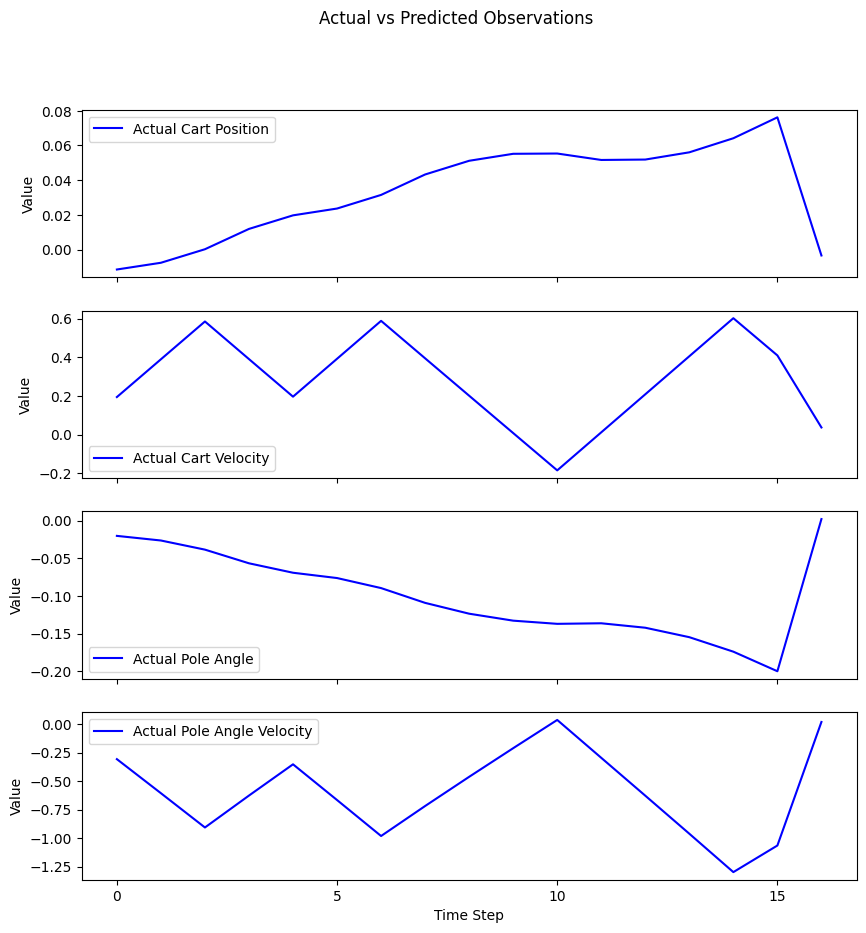

In [150]:
# Create subplots for each set of predicted and actual values
fig, axs = plt.subplots(4, 1, figsize=(10, 10), sharex=True)

legend_labels = {
    1: 'Cart Position',
    2: 'Cart Velocity',
    3: 'Pole Angle',
    4: 'Pole Angle Velocity'
}

# Plot actual and predicted values for each set
for i in range(4):
    axs[i].plot(history[i], color='blue', linestyle='-', label=f'Actual {legend_labels[i+1]}')
    axs[i].set_ylabel('Value')
    axs[i].legend()
    axs[i].set_xticks(range(0, len(history[i]), 5))

# Add labels and title
axs[-1].set_xlabel('Time Step')
plt.suptitle('Actual vs Predicted Observations')

# Show the plot
plt.show()